In [137]:
import pandas as pd
import seaborn as sns
import joblib
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
import xgboost as xgb
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, mean_squared_error
import numpy as np

In [34]:
dataset = pd.read_excel("../data/dataset.xlsx", dtype = {"gameId" : "str"}, index_col=0)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7194 entries, 0 to 7193
Data columns (total 54 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gameId                        7194 non-null   object 
 1   Blue_Adc_championDamageShare  7194 non-null   float64
 2   Blue_Adc_creepScorePerTime    7194 non-null   float64
 3   Blue_Adc_goldEarnedPerTime    7194 non-null   float64
 4   Blue_Adc_kda                  7194 non-null   float64
 5   Blue_Adc_wardsScorePerTime    7194 non-null   float64
 6   Blue_Jgl_championDamageShare  7194 non-null   float64
 7   Blue_Jgl_creepScorePerTime    7194 non-null   float64
 8   Blue_Jgl_goldEarnedPerTime    7194 non-null   float64
 9   Blue_Jgl_kda                  7194 non-null   float64
 10  Blue_Jgl_wardsScorePerTime    7194 non-null   float64
 11  Blue_Mid_championDamageShare  7194 non-null   float64
 12  Blue_Mid_creepScorePerTime    7194 non-null   float64
 13  Blue_Mid

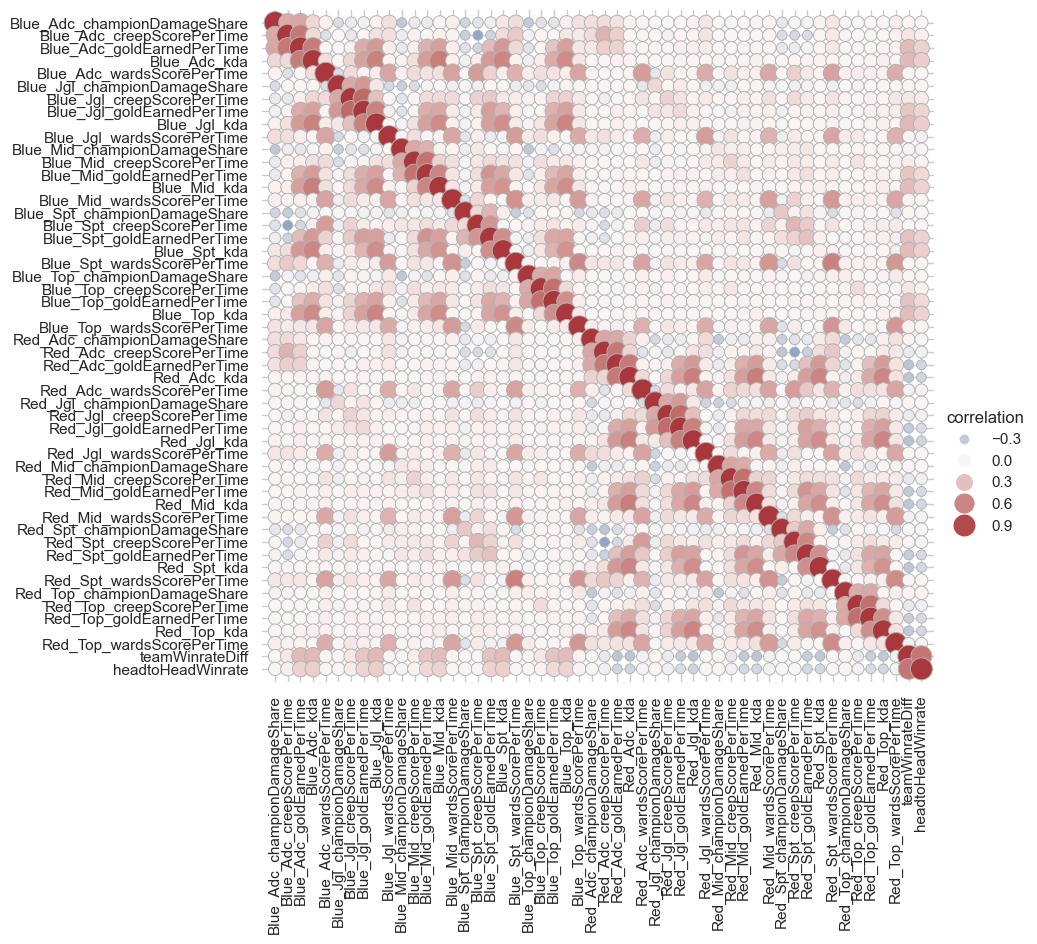

In [35]:

# 상관 행렬 계산 및 long-form 데이터로 변환
corr_mat = dataset.iloc[:, 1:-1].corr().stack().reset_index(name="correlation")
corr_mat.columns = ["level_0", "level_1", "correlation"]

# 상관 행렬 시각화
g = sns.relplot(
    data=corr_mat,
    x="level_0", y="level_1", hue="correlation", size="correlation",
    palette="vlag", hue_norm=(-1, 1), edgecolor=".7",
    height=10, sizes=(50, 250), size_norm=(-.2, .8),
)

# 그래프 설정 조정
g.set(xlabel="", ylabel="", aspect="equal")
g.despine(left=True, bottom=True)
g.ax.margins(.02)
for label in g.ax.get_xticklabels():
    label.set_rotation(90)


In [36]:
dataset, scaler = joblib.load("../data/dataset_draft5_7.pkl")
dataset.drop(["gameId", "winner"], axis = 1, inplace = True)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6884 entries, 0 to 6883
Data columns (total 68 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Blue_Adc_assistsPerTime    6884 non-null   float64
 1   Blue_Adc_deathsPerTime     6884 non-null   float64
 2   Blue_Adc_killsPerTime      6884 non-null   float64
 3   Blue_Jgl_assistsPerTime    6884 non-null   float64
 4   Blue_Jgl_deathsPerTime     6884 non-null   float64
 5   Blue_Jgl_killsPerTime      6884 non-null   float64
 6   Blue_Mid_assistsPerTime    6884 non-null   float64
 7   Blue_Mid_deathsPerTime     6884 non-null   float64
 8   Blue_Mid_killsPerTime      6884 non-null   float64
 9   Blue_Spt_assistsPerTime    6884 non-null   float64
 10  Blue_Top_assistsPerTime    6884 non-null   float64
 11  Blue_Top_deathsPerTime     6884 non-null   float64
 12  Blue_Top_killsPerTime      6884 non-null   float64
 13  Red_Adc_assistsPerTime     6884 non-null   float

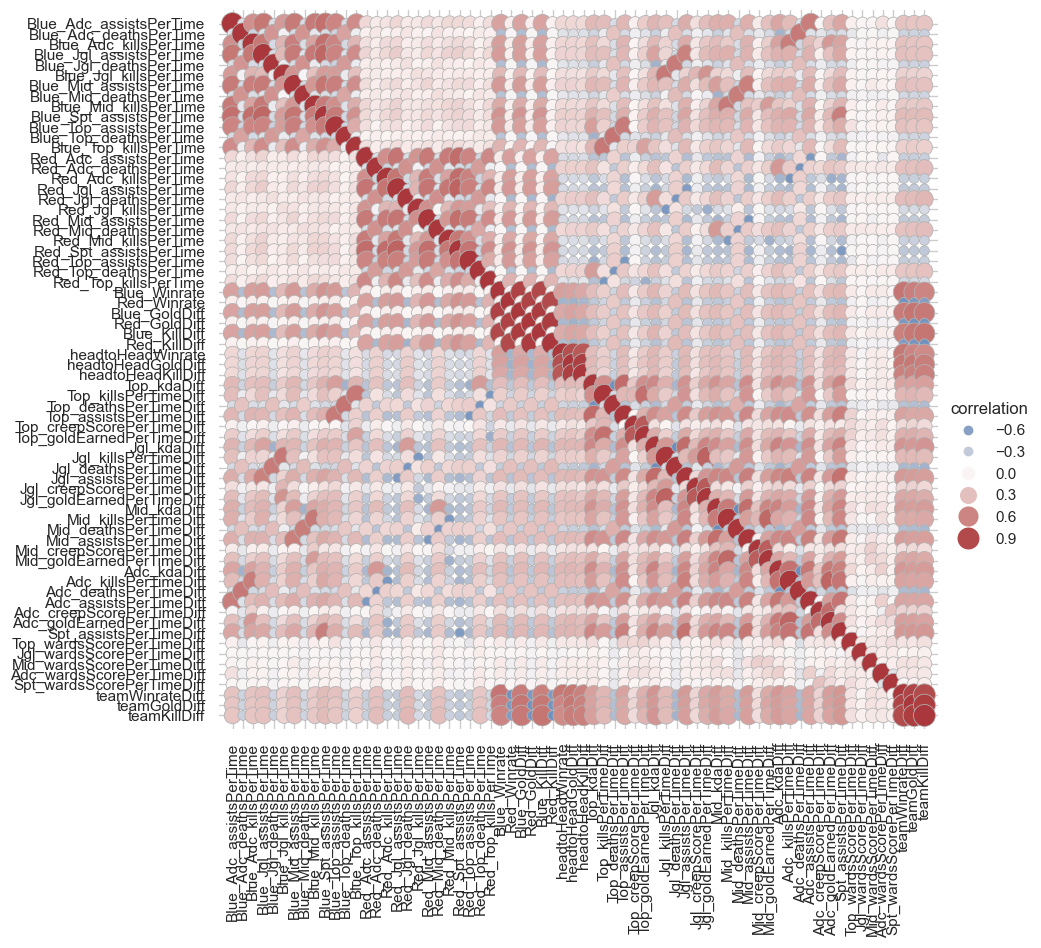

In [37]:

# 상관 행렬 계산 및 long-form 데이터로 변환
corr_mat = dataset.corr().stack().reset_index(name="correlation")
corr_mat.columns = ["level_0", "level_1", "correlation"]

# 상관 행렬 시각화
g = sns.relplot(
    data=corr_mat,
    x="level_0", y="level_1", hue="correlation", size="correlation",
    palette="vlag", hue_norm=(-1, 1), edgecolor=".7",
    height=10, sizes=(50, 250), size_norm=(-.2, .8),
)

# 그래프 설정 조정
g.set(xlabel="", ylabel="", aspect="equal")
g.despine(left=True, bottom=True)
g.ax.margins(.02)
for label in g.ax.get_xticklabels():
    label.set_rotation(90)


In [159]:

dataset, scaler = joblib.load("../data/dataset_draft7_1.pkl")
dropped_dataset = dataset.drop(["gameId", "winner"], axis = 1)


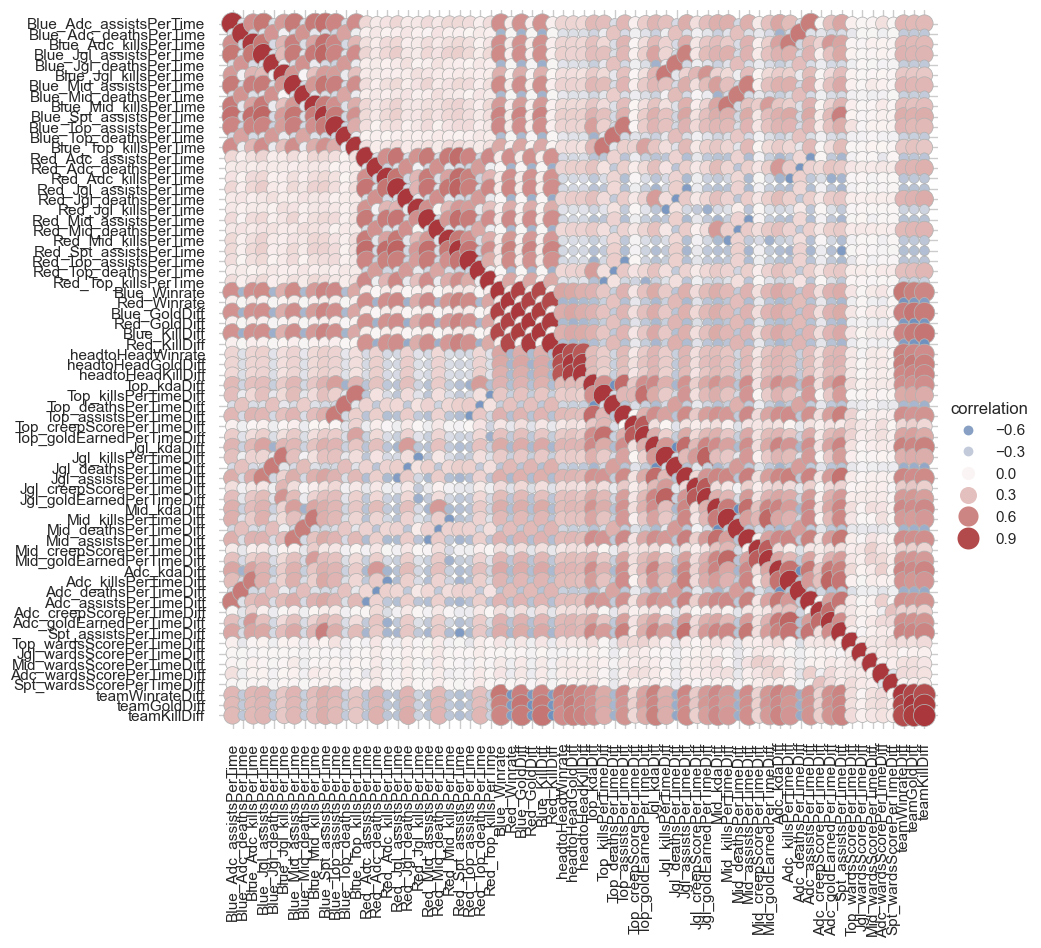

In [160]:


# 상관 행렬 계산 및 long-form 데이터로 변환
corr_mat = dropped_dataset.corr().stack().reset_index(name="correlation")
corr_mat.columns = ["level_0", "level_1", "correlation"]

# 상관 행렬 시각화
g = sns.relplot(
    data=corr_mat,
    x="level_0", y="level_1", hue="correlation", size="correlation",
    palette="vlag", hue_norm=(-1, 1), edgecolor=".7",
    height=10, sizes=(50, 250), size_norm=(-.2, .8),
)

# 그래프 설정 조정
g.set(xlabel="", ylabel="", aspect="equal")
g.despine(left=True, bottom=True)
g.ax.margins(.02)
for label in g.ax.get_xticklabels():
    label.set_rotation(90)

In [161]:
from sklearn.preprocessing import LabelEncoder
label_incoder = LabelEncoder()
dataset["winner"] = label_incoder.fit_transform(dataset["winner"])
dropped_dataset = dataset.drop("gameId", axis = 1)
desired_X_column_list = list(dropped_dataset.columns)
desired_X_column_list.remove("winner")
dropped_dataset.drop_duplicates(desired_X_column_list)
label_incoder = LabelEncoder()
y = dropped_dataset["winner"]
X = dropped_dataset.drop(["winner"], axis=1)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6884 entries, 0 to 6883
Data columns (total 68 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Blue_Adc_assistsPerTime    6884 non-null   float64
 1   Blue_Adc_deathsPerTime     6884 non-null   float64
 2   Blue_Adc_killsPerTime      6884 non-null   float64
 3   Blue_Jgl_assistsPerTime    6884 non-null   float64
 4   Blue_Jgl_deathsPerTime     6884 non-null   float64
 5   Blue_Jgl_killsPerTime      6884 non-null   float64
 6   Blue_Mid_assistsPerTime    6884 non-null   float64
 7   Blue_Mid_deathsPerTime     6884 non-null   float64
 8   Blue_Mid_killsPerTime      6884 non-null   float64
 9   Blue_Spt_assistsPerTime    6884 non-null   float64
 10  Blue_Top_assistsPerTime    6884 non-null   float64
 11  Blue_Top_deathsPerTime     6884 non-null   float64
 12  Blue_Top_killsPerTime      6884 non-null   float64
 13  Red_Adc_assistsPerTime     6884 non-null   float

In [163]:

N_COMPONENTS = 5
data_for_pca = X.iloc[:, list(range(0, 13))]
columns_for_pca = data_for_pca.columns
values_for_pca = data_for_pca.values
#values_for_pca = StandardScaler().fit_transform(values_for_pca)
pca = PCA(n_components=N_COMPONENTS)
principalComponents = pca.fit_transform(values_for_pca)
explained_variance_ratio = pca.explained_variance_ratio_
total_explained_variance = sum(explained_variance_ratio)
print("Explained variance ratio of each principal component:", explained_variance_ratio)
print("Total explained variance:", total_explained_variance)
principalDf_blue = pd.DataFrame(data=principalComponents, columns=[f'principal component of blue {i}' for i in range(N_COMPONENTS)])
principalDf_blue.head()


Explained variance ratio of each principal component: [0.4289529  0.197088   0.05812319 0.0551771  0.05332494]
Total explained variance: 0.7926661212428301


,principal component of blue 0,principal component of blue 1,principal component of blue 2,principal component of blue 3,principal component of blue 4
0,-2.000468,-1.874356,0.478817,1.129657,0.634761
1,-2.273412,0.585456,0.718013,0.274685,0.999941
2,-2.293924,-1.021454,-0.258014,-0.369270,-0.084539
3,-0.903968,1.353929,-1.314380,0.371304,-1.723420
4,-1.950235,0.702926,0.769842,1.991291,1.610312


In [164]:
N_COMPONENTS = 5
data_for_pca = X.iloc[:, list(range(13, 26))]
columns_for_pca = data_for_pca.columns
values_for_pca = data_for_pca.values
#values_for_pca = StandardScaler().fit_transform(values_for_pca)
pca = PCA(n_components=N_COMPONENTS)
principalComponents = pca.fit_transform(values_for_pca)
explained_variance_ratio = pca.explained_variance_ratio_
total_explained_variance = sum(explained_variance_ratio)
print("Explained variance ratio of each principal component:", explained_variance_ratio)
print("Total explained variance:", total_explained_variance)
principalDf_red = pd.DataFrame(data=principalComponents, columns=[f'principal component of red {i}' for i in range(N_COMPONENTS)])
principalDf_red.head()

Explained variance ratio of each principal component: [0.43631691 0.20133023 0.05728573 0.05319352 0.05182894]
Total explained variance: 0.7999553361945145


,principal component of red 0,principal component of red 1,principal component of red 2,principal component of red 3,principal component of red 4
0,-0.074448,1.446266,0.414798,0.223271,1.165147
1,-2.786457,0.438470,0.427736,-0.032217,0.359300
2,4.068886,2.709704,-2.208687,2.358072,0.284230
3,-3.788293,0.983802,-0.623648,-0.076217,0.036138
4,-1.964893,-1.948262,0.251032,-1.524586,-0.414012


In [165]:
N_COMPONENTS = 2
target_column_list = ["Blue_Winrate", "Blue_GoldDiff", "Blue_KillDiff", "Red_Winrate", "Red_GoldDiff", "Red_KillDiff", "teamWinrateDiff", "teamGoldDiff", "teamKillDiff"]
data_for_pca = X.loc[:, target_column_list]
columns_for_pca = data_for_pca.columns
values_for_pca = data_for_pca.values
#values_for_pca = StandardScaler().fit_transform(values_for_pca)
pca = PCA(n_components=N_COMPONENTS)
principalComponents = pca.fit_transform(values_for_pca)
explained_variance_ratio = pca.explained_variance_ratio_
total_explained_variance = sum(explained_variance_ratio)
print("Explained variance ratio of each principal component:", explained_variance_ratio)
print("Total explained variance:", total_explained_variance)
principalDf_team = pd.DataFrame(data=principalComponents, columns=[f'principal component of red {i}' for i in range(N_COMPONENTS)])
principalDf_team.head()

Explained variance ratio of each principal component: [0.61500245 0.34114274]
Total explained variance: 0.9561451897252482


,principal component of red 0,principal component of red 1
0,1.979812,2.019234
1,-1.307439,2.339145
2,-1.428300,0.336244
3,1.330090,0.144112
4,-1.334205,1.407106


In [166]:
N_COMPONENTS = 2
target_column_list = ["headtoHeadWinrate", "headtoHeadGoldDiff", "headtoHeadKillDiff"]
data_for_pca = X.loc[:, target_column_list]
columns_for_pca = data_for_pca.columns
values_for_pca = data_for_pca.values
#values_for_pca = StandardScaler().fit_transform(values_for_pca)
pca = PCA(n_components=N_COMPONENTS)
principalComponents = pca.fit_transform(values_for_pca)
explained_variance_ratio = pca.explained_variance_ratio_
total_explained_variance = sum(explained_variance_ratio)
print("Explained variance ratio of each principal component:", explained_variance_ratio)
print("Total explained variance:", total_explained_variance)
principalDf_head = pd.DataFrame(data=principalComponents, columns=[f'principal component of red {i}' for i in range(N_COMPONENTS)])
principalDf_head.head()

Explained variance ratio of each principal component: [0.9268743  0.06017562]
Total explained variance: 0.9870499228610331


,principal component of red 0,principal component of red 1
0,3.786695,-1.338688
1,-0.279827,0.271357
2,0.519746,-0.359124
3,-0.090031,0.070319
4,-1.505588,-0.609675


In [167]:
N_COMPONENTS = 5
data_for_pca = X.iloc[:, 35:60]
columns_for_pca = data_for_pca.columns
values_for_pca = data_for_pca.values
#values_for_pca = StandardScaler().fit_transform(values_for_pca)
pca = PCA(n_components=N_COMPONENTS)
principalComponents = pca.fit_transform(values_for_pca)
explained_variance_ratio = pca.explained_variance_ratio_
total_explained_variance = sum(explained_variance_ratio)
print("Explained variance ratio of each principal component:", explained_variance_ratio)
print("Total explained variance:", total_explained_variance)
principalDf_diff = pd.DataFrame(data=principalComponents, columns=[f'principal component of red {i}' for i in range(N_COMPONENTS)])
principalDf_diff.head()

Explained variance ratio of each principal component: [0.39605612 0.1530843  0.12394471 0.11335657 0.07585175]
Total explained variance: 0.8622934459662996


,principal component of red 0,principal component of red 1,principal component of red 2,principal component of red 3,principal component of red 4
0,4.491605,1.150541,2.653076,1.588918,2.831621
1,-0.250230,0.099415,0.189198,1.217697,0.105815
2,3.383173,-0.997392,-0.399134,-0.196415,-0.080579
3,-1.430172,-1.035312,0.482736,1.011028,0.224105
4,-2.931524,-2.405874,-0.749807,1.609812,-3.162188


'for label in g.ax.get_xticklabels():\n    label.set_rotation(90)\n'

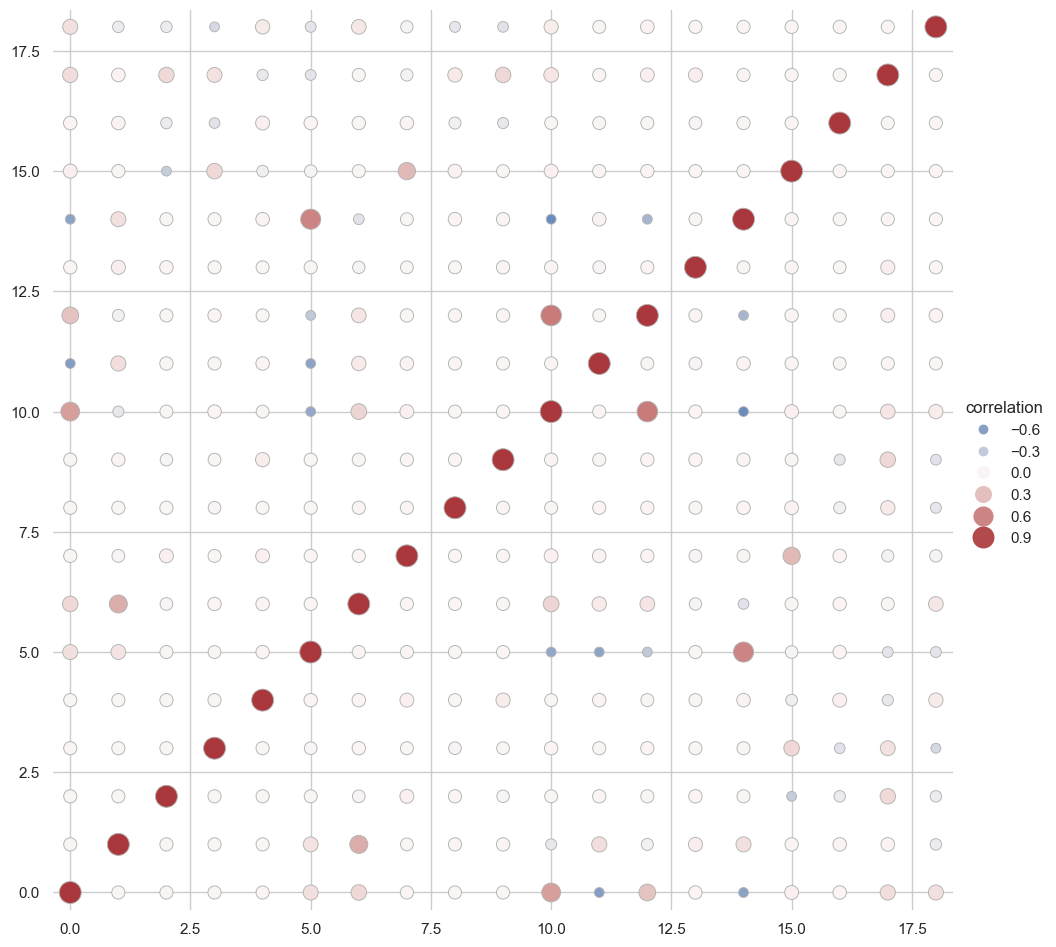

In [168]:
dataset_pca_done = pd.concat([principalDf_blue, principalDf_red, principalDf_team, principalDf_head, principalDf_diff], axis=1, ignore_index=True)


# 상관 행렬 계산 및 long-form 데이터로 변환
corr_mat = dataset_pca_done.corr().stack().reset_index(name="correlation")
corr_mat.columns = ["level_0", "level_1", "correlation"]

# 상관 행렬 시각화
g = sns.relplot(
    data=corr_mat,
    x="level_0", y="level_1", hue="correlation", size="correlation",
    palette="vlag", hue_norm=(-1, 1), edgecolor=".7",
    height=10, sizes=(50, 250), size_norm=(-.2, .8),
)

# 그래프 설정 조정
g.set(xlabel="", ylabel="", aspect="equal")
g.despine(left=True, bottom=True)
g.ax.margins(.02)
"""for label in g.ax.get_xticklabels():
    label.set_rotation(90)
"""

In [169]:
dataset_pca_done.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6884 entries, 0 to 6883
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       6884 non-null   float64
 1   1       6884 non-null   float64
 2   2       6884 non-null   float64
 3   3       6884 non-null   float64
 4   4       6884 non-null   float64
 5   5       6884 non-null   float64
 6   6       6884 non-null   float64
 7   7       6884 non-null   float64
 8   8       6884 non-null   float64
 9   9       6884 non-null   float64
 10  10      6884 non-null   float64
 11  11      6884 non-null   float64
 12  12      6884 non-null   float64
 13  13      6884 non-null   float64
 14  14      6884 non-null   float64
 15  15      6884 non-null   float64
 16  16      6884 non-null   float64
 17  17      6884 non-null   float64
 18  18      6884 non-null   float64
dtypes: float64(19)
memory usage: 1022.0 KB


In [170]:
X.iloc[:, 60:65].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6884 entries, 0 to 6883
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Top_wardsScorePerTimeDiff  6884 non-null   float64
 1   Jgl_wardsScorePerTimeDiff  6884 non-null   float64
 2   Mid_wardsScorePerTimeDiff  6884 non-null   float64
 3   Adc_wardsScorePerTimeDiff  6884 non-null   float64
 4   Spt_wardsScorePerTimeDiff  6884 non-null   float64
dtypes: float64(5)
memory usage: 269.0 KB


In [171]:
X = pd.concat([dataset_pca_done, X.iloc[:, 60:65]], axis=1, ignore_index=True)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6884 entries, 0 to 6883
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       6884 non-null   float64
 1   1       6884 non-null   float64
 2   2       6884 non-null   float64
 3   3       6884 non-null   float64
 4   4       6884 non-null   float64
 5   5       6884 non-null   float64
 6   6       6884 non-null   float64
 7   7       6884 non-null   float64
 8   8       6884 non-null   float64
 9   9       6884 non-null   float64
 10  10      6884 non-null   float64
 11  11      6884 non-null   float64
 12  12      6884 non-null   float64
 13  13      6884 non-null   float64
 14  14      6884 non-null   float64
 15  15      6884 non-null   float64
 16  16      6884 non-null   float64
 17  17      6884 non-null   float64
 18  18      6884 non-null   float64
 19  19      6884 non-null   float64
 20  20      6884 non-null   float64
 21  21      6884 non-null   float64
 22  

In [172]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [173]:
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', n_estimators=50)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_train_predict = model.predict(X_train)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(accuracy_score(y_train, y_train_predict))

Accuracy: 0.6248789932236205
0.9665836446658365


In [179]:
evaluation = [(X_train, y_train), (X_test, y_test)]
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric = "rmse", learning_rate = 0.01, n_estimators = 600, max_depth = 4, min_child_weight = 4, subsample = 0.7, colsample_bytree=0.7)
model.fit(X_train, y_train, early_stopping_rounds=20, eval_set = evaluation)
y_pred = model.predict(X_test)
y_train_predict = model.predict(X_train)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(accuracy_score(y_train, y_train_predict))

[0]	validation_0-rmse:0.49814	validation_1-rmse:0.49847
[1]	validation_0-rmse:0.49739	validation_1-rmse:0.49782
[2]	validation_0-rmse:0.49664	validation_1-rmse:0.49718
[3]	validation_0-rmse:0.49625	validation_1-rmse:0.49693
[4]	validation_0-rmse:0.49554	validation_1-rmse:0.49638
[5]	validation_0-rmse:0.49498	validation_1-rmse:0.49591
[6]	validation_0-rmse:0.49426	validation_1-rmse:0.49530
[7]	validation_0-rmse:0.49356	validation_1-rmse:0.49471
[8]	validation_0-rmse:0.49288	validation_1-rmse:0.49416
[9]	validation_0-rmse:0.49217	validation_1-rmse:0.49355
[10]	validation_0-rmse:0.49154	validation_1-rmse:0.49308
[11]	validation_0-rmse:0.49095	validation_1-rmse:0.49262
[12]	validation_0-rmse:0.49039	validation_1-rmse:0.49220
[13]	validation_0-rmse:0.48985	validation_1-rmse:0.49179
[14]	validation_0-rmse:0.48920	validation_1-rmse:0.49126
[15]	validation_0-rmse:0.48863	validation_1-rmse:0.49081
[16]	validation_0-rmse:0.48806	validation_1-rmse:0.49037


c:\Users\NT551\anaconda3\envs\newdeal\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:0.48745	validation_1-rmse:0.48994
[18]	validation_0-rmse:0.48691	validation_1-rmse:0.48947
[19]	validation_0-rmse:0.48630	validation_1-rmse:0.48901
[20]	validation_0-rmse:0.48570	validation_1-rmse:0.48855
[21]	validation_0-rmse:0.48511	validation_1-rmse:0.48806
[22]	validation_0-rmse:0.48454	validation_1-rmse:0.48760
[23]	validation_0-rmse:0.48399	validation_1-rmse:0.48716
[24]	validation_0-rmse:0.48343	validation_1-rmse:0.48677
[25]	validation_0-rmse:0.48301	validation_1-rmse:0.48645
[26]	validation_0-rmse:0.48256	validation_1-rmse:0.48611
[27]	validation_0-rmse:0.48219	validation_1-rmse:0.48583
[28]	validation_0-rmse:0.48165	validation_1-rmse:0.48544
[29]	validation_0-rmse:0.48113	validation_1-rmse:0.48506
[30]	validation_0-rmse:0.48078	validation_1-rmse:0.48478
[31]	validation_0-rmse:0.48026	validation_1-rmse:0.48434
[32]	validation_0-rmse:0.47983	validation_1-rmse:0.48403
[33]	validation_0-rmse:0.47935	validation_1-rmse:0.48369
[34]	validation_0-rmse:0.47886	

In [181]:

# 하이퍼파라미터 그리드 정의
param_grid = {
    "max_depth" : [3, 4, 5, 6],
    'min_child_weight' : [1, 3, 5, 7],
    'colsample_bytree': [0.7, 0.9],
    "gamma" : [0, 5, 10],
    "reg_lambda" : [1, 1.5, 2],
    #'gamma' : [0, 5, 10]
}
evaluation = [(X_train, y_train), (X_test, y_test)]
# GridSearchCV 객체 생성
grid_search = GridSearchCV(estimator=xgb.XGBClassifier(use_label_encoder=False, eval_metric='rmse', learning_rate = 0.01, n_estimators = 500, early_stopping_rounds = 20, subsample = 0.7),
                           param_grid=param_grid,
                           scoring='neg_mean_squared_error',
                           cv=5,
                           verbose=1)


# 그리드 서치 수행
grid_search.fit(X_train, y_train, eval_set = evaluation, verbose = False)

# 최적의 하이퍼파라미터 출력
print(f"Best parameters found: {grid_search.best_params_}")

# 최적의 하이퍼파라미터로 모델 재학습
best_model = grid_search.best_estimator_

# 예측
y_pred_best = best_model.predict(X_test)

# 정확도 출력
mse_best = mean_squared_error(y_test, y_pred_best)
print(f"mse with tuned parameters: {mse_best:.4f}")

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
Best parameters found: {'colsample_bytree': 0.9, 'gamma': 0, 'max_depth': 6, 'min_child_weight': 1, 'reg_lambda': 1}
mse with tuned parameters: 0.3456


In [182]:
print(accuracy_score(y_test, y_pred_best))

0.6544046466602129


In [183]:
joblib.dump((model, scaler, X.columns), '../data/model_draft7_1_4.pkl')

['../data/model_draft7_1_4.pkl']

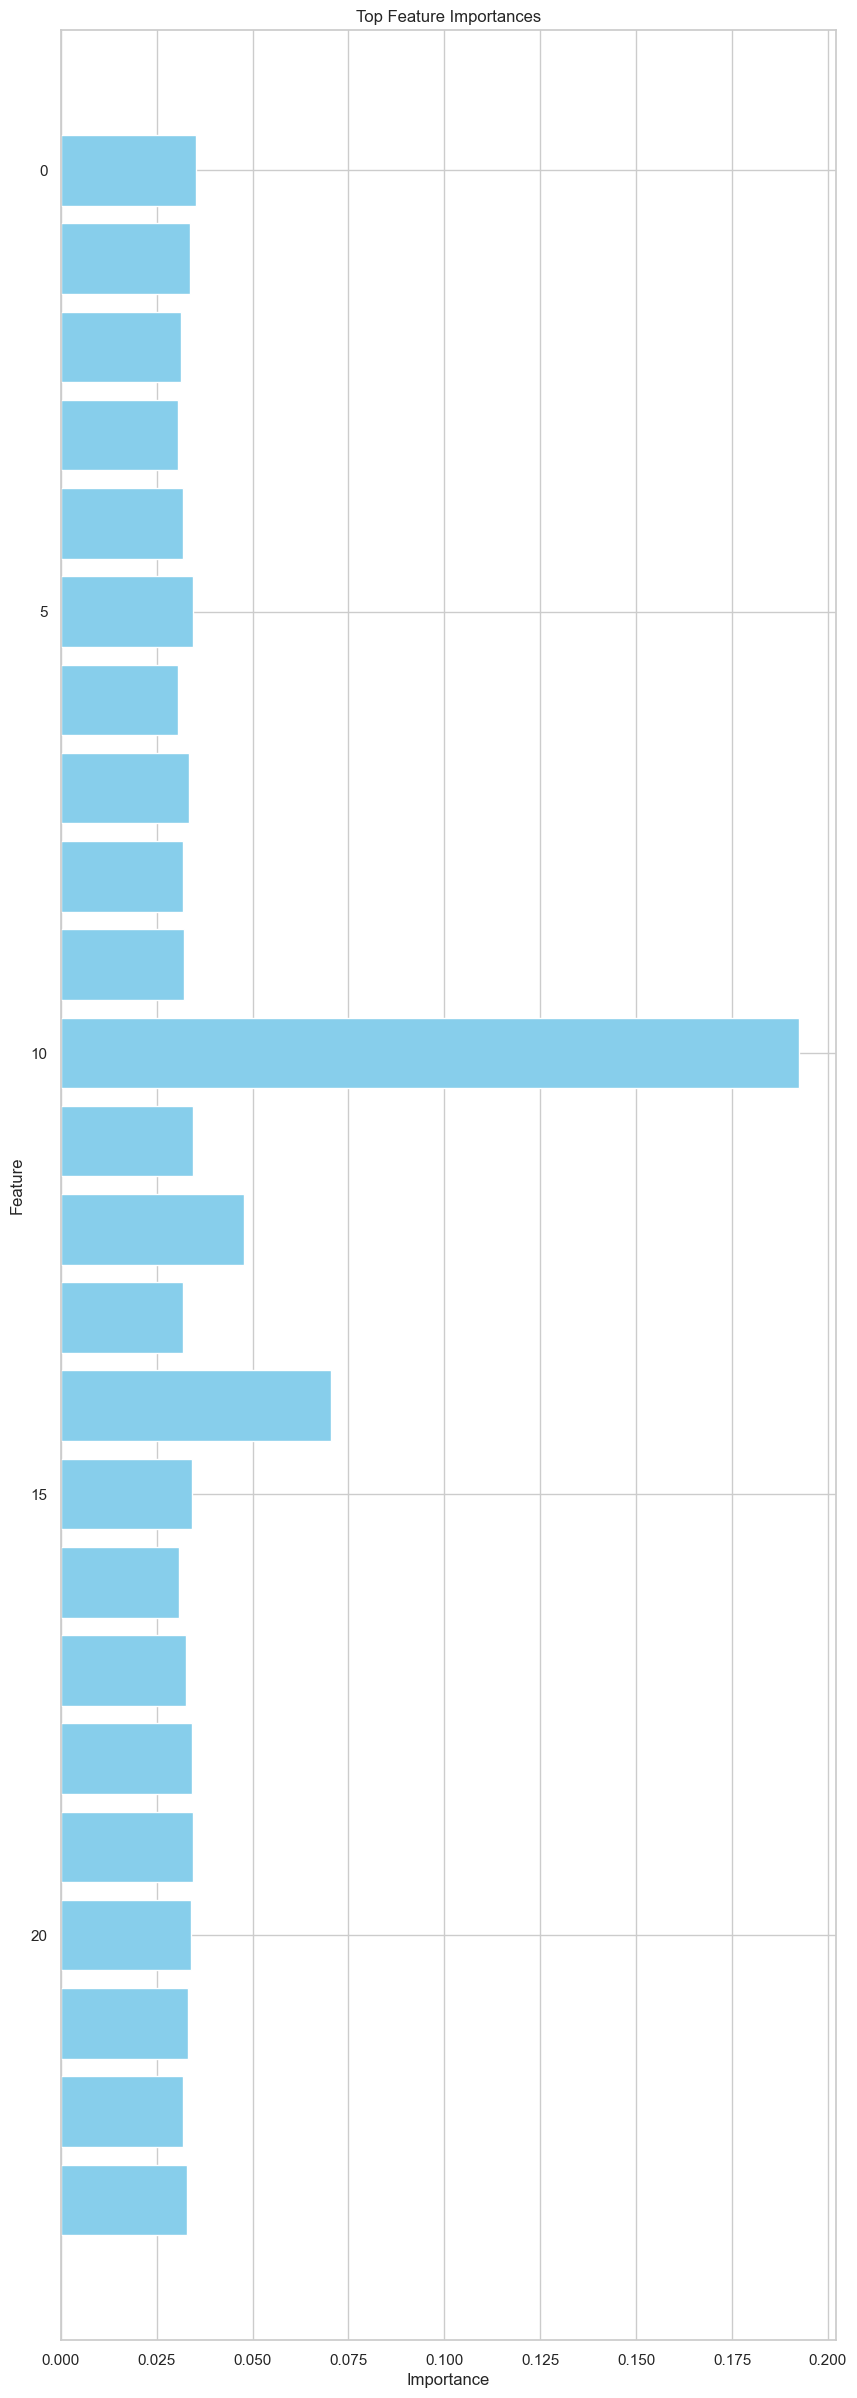

In [198]:
feature_importances = best_model.feature_importances_
features = list(X.columns)
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
top_10_features = importance_df
plt.figure(figsize=(10, 30))
plt.barh(top_10_features['Feature'], top_10_features['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top Feature Importances')
plt.gca().invert_yaxis()
plt.show()